# Rugosidad interna en cristalino

Tenemos un cristalino con una variación de índice de refracción dado por el modelo de Navarro y le vamos a meter un % de rugosidad en el índice con una cierto tamaño

In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'

from pprint import pprint

In [2]:
from phyton_optics import sp, nm, plt, mm, degrees, um, np
from phyton_optics.scalar_sources_X import Scalar_source_X
from phyton_optics.scalar_masks_XZ import Scalar_mask_XZ

from phyton_optics.utils_common import ndgrid
from numpy.fft import fftshift

from foco.eye_models.navarro_eye import Navarro_eye as eye
import matplotlib.cm as cm

from ipywidgets import interact

/home/luismiguel/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Definición del ojo

In [15]:
eye_length = 23.465 * mm
x0 = sp.linspace(-eye_length/4, eye_length/4, 1024*16)
z0 = sp.linspace(-100*um, 9*mm, 1024*16)
X, Z = ndgrid(x0, z0)
wavelength = 550 * nm 


In [16]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

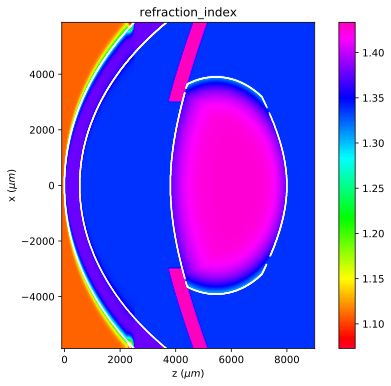

In [17]:
eye_simple = eye(x0, z0, wavelength, age=46, D=5, error=0, u0=u0, n_background=1.11, info='')
i_cristalino=eye_simple.define_eye(diam_iris=6*mm, filtering=True, pixels_filtering=200)
eye_simple.draw_refraction_index(draw_borders=True, scale='scaled',
                                 colormap_kind=cm.gist_rainbow)

In [18]:
eye_simple.clear_field()
eye_simple.BPM()

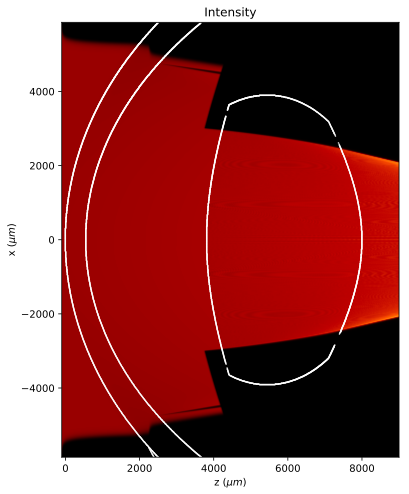

In [19]:
eye_simple.draw(logarithm=True, draw_borders=True, min_incr=0.005, scale='scaled', filename='')

### Variación de la rugosidad en cristalino

((757, 829), (319, 247))
0.21710375189093076


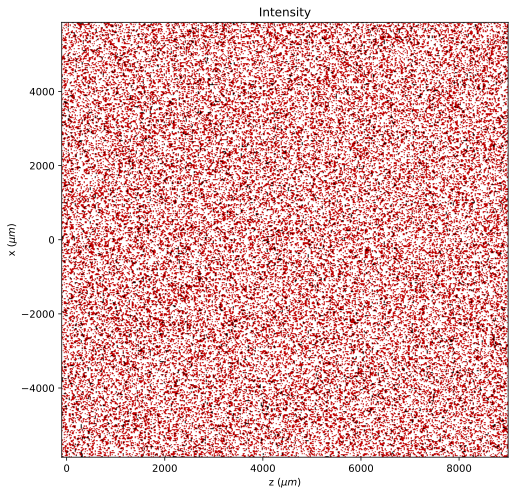

In [9]:
x0 = sp.linspace(-eye_length/4, eye_length/4, 512)
z0 = sp.linspace(-100*um, 9*mm, 512)
X, Z = ndgrid(x0, z0)
wavelength = 550 * nm 

eye_roughness = Scalar_mask_XZ(x0, z0, wavelength, n_background=1.11, info='')
eye_roughness.roughness(t=(1000*um,1000*um), s=.25*um)
eye_roughness.draw()

### Ubicación de scattereadores

(1.4323647906239785, 1.1109754608716855, 32.640155692978205, 10, 32)


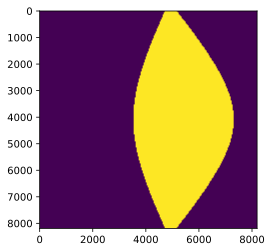

In [63]:
area_scatterer=sp.pi*(10*um)**2
concentracion=0.0001

plt.imshow(i_cristalino)
delta_x=eye_simple.x[1]-eye_simple.x[0]
delta_z=eye_simple.z[1]-eye_simple.z[0]
area_cristalino=i_cristalino.sum()*delta_x*delta_z
length_x=(eye_simple.x[-1]-eye_simple.x[0])
length_z=(eye_simple.z[-1]-eye_simple.z[0])
area_superficie=length_x*length_z



Num_scatterers= int(area_cristalino*concentracion/(area_scatterer))

num_total=int(Num_scatterers*(area_superficie/area_cristalino))

print(delta_x, delta_z, area_cristalino*1e-6, Num_scatterers, num_total) #um, um, mm^2

x_rand=eye_simple.x[0]+length_x*np.random.rand(num_total)
z_rand=eye_simple.z[0]+length_z*np.random.rand(num_total)

In [64]:
x_rand,z_rand
#están en todo el área. Asignar una posición en el tablero bidimensional y eliminar 
#los que están fuera del cristalino

(array([ 3402.21053156,  2923.64056545,   610.95814705, -1206.18401602,
         5411.23987474,  5572.61093513,  2161.61963811,   -99.90811729,
        -3092.55127044,  3634.30617585,  1031.82773722, -1067.63225109,
        -4428.0742836 ,  4046.91949118,   459.4845409 ,  5136.49692517,
        -5035.48043574,  3799.31164048,  1575.69621992,  2089.93528936,
        -4633.04114221, -5745.49530066,    36.93896325, -3141.54515123,
          695.41504118,  2700.92646906, -3854.66699373,  2764.06511509,
          494.258387  ,  4073.67096558, -2490.61279707,  1667.02755827]),
 array([ 404.84968899, 2826.17811594, 7947.54664455, 5267.44437331,
         933.78876246, 4573.46214311, 7264.95054507, 4198.29821679,
        1912.3310733 , 2413.23900896, 5832.93294268, 7665.38549289,
        1083.73990986, 2497.32652898, 1833.73590267, 5665.46652538,
        4988.30335624, 7777.78392557, 1992.72261811, 1590.8816565 ,
        1229.08434832, 3855.16269306, 1337.5535201 , 7123.26774396,
         365.5

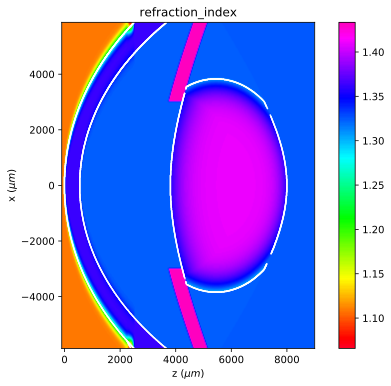

In [7]:
eye_simple.draw_refraction_index(draw_borders=True, scale='scaled',
                                 colormap_kind=cm.gist_rainbow)

(0, 102.12692887505085)

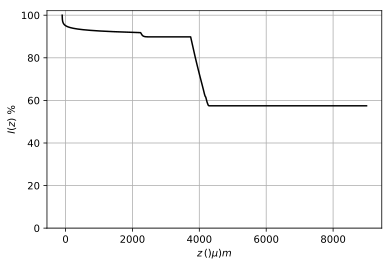

In [10]:
eye_simple.check_intensity();
plt.ylim(ymin=0)

## Densidad de probabilidad

In [41]:
"""
sigma: cross section
g: coeficiente de asimetria
p(theta): función defase
N: particulas por unidad de volumen"""
def phase_function(theta, g):
    return (1-g**2)/(4*sp.pi*(1+g**2-2*g*sp.cos(theta)))

Text(0.5,1.05,u'phase_function: g=0.8')

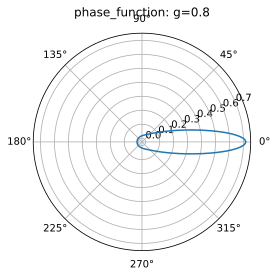

In [42]:
g=0.8
theta=sp.linspace(0,2*sp.pi,360)
plt.polar(theta, phase_function(theta,g))
plt.title('phase_function: g={}'.format(g))

## Determinación del gradiente

In [15]:
phase=sp.angle(eye_simple.u)

In [1]:
plt.imshow(phase)

NameError: name 'plt' is not defined

In [17]:
gradiente=np.gradient(phase)
gradiente=gradiente/

In [ ]:
plt.quiver(eye_simple.X, eye_simple.Z, gradiente[0], gradiente[1], units='xy')

In [ ]:
x=3

## Inclusión de scattereadores

Suponemos que tenemos N particulas scattereadoras. Las vamos a colocar dentro del cristalino.
Estas partículas van a difundir la luz, según un % de la luz que la llega, en otras direcciones.
En esta primera aproximación vamos a suponer que la dirección es k=(0,1)

